In [3]:
import pandas as pd
import numpy as np
import cv2 
import os
import itertools
import shutil
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# To change from .mat to .jpeg format

In [5]:
import h5py
import scipy.io

In [7]:
f = h5py.File('data/1.mat','r')
data = f.get('cjdata/image')
data = np.array(data)

In [8]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [9]:
from PIL import Image

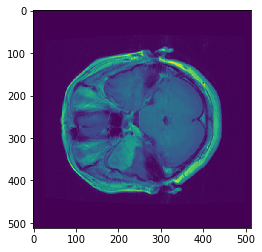

In [14]:
import scipy.misc
plt.imshow(data)
plt.show()

#scipy.misc.imsave('sample.jpg', data)

In [13]:
import imageio
imageio.imwrite('sample.jpg', data)

Lossy conversion from int16 to uint8. Range [0, 3366]. Convert image to uint8 prior to saving to suppress this warning.


In [17]:
cnt1 = 0
cnt2 = 0
cnt3 = 0

for i in range(3064):
    if i == 0: 
        continue
    
    f = h5py.File('data/'+str(i)+'.mat','r')
    data = f.get('cjdata/image')
    data = np.array(data)
    
    label = f.get('cjdata/label')
    
    if(label.value == 1):
        imageio.imwrite('images/1/'+str(cnt1)+'.jpg', data)
        cnt1 = cnt1 + 1
    
    elif(label.value == 2):
        imageio.imwrite('images/2/'+str(cnt2)+'.jpg', data)
        cnt2 = cnt2 + 1
        
    elif(label.value == 3):
        imageio.imwrite('images/3/'+str(cnt3)+'.jpg', data)
        cnt3 = cnt3 + 1

Lossy conversion from int16 to uint8. Range [0, 3366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1730]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2900]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2550]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2560]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 870]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0

Lossy conversion from int16 to uint8. Range [0, 1565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1500]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range

Lossy conversion from int16 to uint8. Range [0, 1934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2690]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Rang

Lossy conversion from int16 to uint8. Range [0, 2312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2110]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1790]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 990]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 680]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 

Lossy conversion from int16 to uint8. Range [0, 2336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 850]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0,

Lossy conversion from int16 to uint8. Range [0, 1016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1160]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 4049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3610]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 910]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range

Lossy conversion from int16 to uint8. Range [0, 4174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 700]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0

Lossy conversion from int16 to uint8. Range [0, 2722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2530]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2560]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2400]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 

Lossy conversion from int16 to uint8. Range [0, 3051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3090]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1030]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1090]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 5214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4970]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 7405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 7638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5780]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9700]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9420]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. R

Lossy conversion from int16 to uint8. Range [0, 6368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 6404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3340]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 10494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10950]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint

Lossy conversion from int16 to uint8. Range [0, 6181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4270]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2300]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 5097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3780]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 6164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 5950]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3110]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5420]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3450]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

TO name the images as their respective classes

In [26]:
import h5py
import imageio
cnt1 = 0
cnt2 = 0
cnt3 = 0
for i in range(3064):
    if i == 0: 
        continue
    
    f = h5py.File('data/'+str(i)+'.mat','r')
    data = f.get('cjdata/image')
    data = np.array(data)
    
    label = f.get('cjdata/label')
    
    if(label.value == 1):
        imageio.imwrite('images2/1/'+'Meningioma'+str(cnt1)+'.jpg', data)
        cnt1 = cnt1 + 1
    
    elif(label.value == 2):
        imageio.imwrite('images2/2/'+'Glioma'+str(cnt2)+'.jpg', data)
        cnt2 = cnt2 + 1
        
    elif(label.value == 3):
        imageio.imwrite('images2/3/'+'Pituitary Tumor'+str(cnt3)+'.jpg', data)
        cnt3 = cnt3 + 1

Lossy conversion from int16 to uint8. Range [0, 3366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1730]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2900]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2550]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2560]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 870]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0

Lossy conversion from int16 to uint8. Range [0, 1565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1500]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range

Lossy conversion from int16 to uint8. Range [0, 1934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2690]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Rang

Lossy conversion from int16 to uint8. Range [0, 2312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2110]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1790]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 990]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 680]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 

Lossy conversion from int16 to uint8. Range [0, 2336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 850]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0,

Lossy conversion from int16 to uint8. Range [0, 1016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1160]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ran

Lossy conversion from int16 to uint8. Range [0, 4049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3610]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 910]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range

Lossy conversion from int16 to uint8. Range [0, 4174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 700]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0

Lossy conversion from int16 to uint8. Range [0, 2722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2530]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2560]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2400]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 

Lossy conversion from int16 to uint8. Range [0, 3051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3090]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1030]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1090]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [

Lossy conversion from int16 to uint8. Range [0, 5214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4970]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 7405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 7638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5780]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9700]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9420]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. R

Lossy conversion from int16 to uint8. Range [0, 6368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 6404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3340]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 10494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 10950]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint

Lossy conversion from int16 to uint8. Range [0, 6181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 9595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 8793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 7377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4270]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2300]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 5097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3780]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 6164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 5950]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3110]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5420]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 3228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3450]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 3734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra

Lossy conversion from int16 to uint8. Range [0, 2266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 1676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 4252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 5676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 6289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Ra